In [28]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [29]:
# Step 2: Define function to load from a GeoTIFF file
def load_tif(filepath):
    """Load a single-band TIFF file as a numpy array."""
    with rasterio.open(filepath) as src:
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        
        return src.read(1), src.transform, src.crs, extent

In [41]:
PATH = './Landsat8/cropped_bbox/2023/'

image_name = 'LC08_L2SP_137044_20231102_20231109_02_T1_SR_B'

band_paths = [PATH + 'LC08_L2SP_137044_20231102_20231109_02_T1_SR_B3.TIF', 
              PATH + 'LC08_L2SP_137044_20231102_20231109_02_T1_SR_B2.TIF',
              PATH + 'LC08_L2SP_137044_20231102_20231109_02_T1_SR_B1.TIF'
              ]

In [44]:
# Load each band and stack them
bands = []
for path in band_paths:
    with rasterio.open(path) as src:
        bands.append(src.read(1))  # Read the first band from each file

# Stack bands along the third dimension
stacked_image = np.dstack(bands)

# Optional: Normalize bands for better visualization

stacked_image = (stacked_image - stacked_image.min()) / (stacked_image.max() - stacked_image.min())

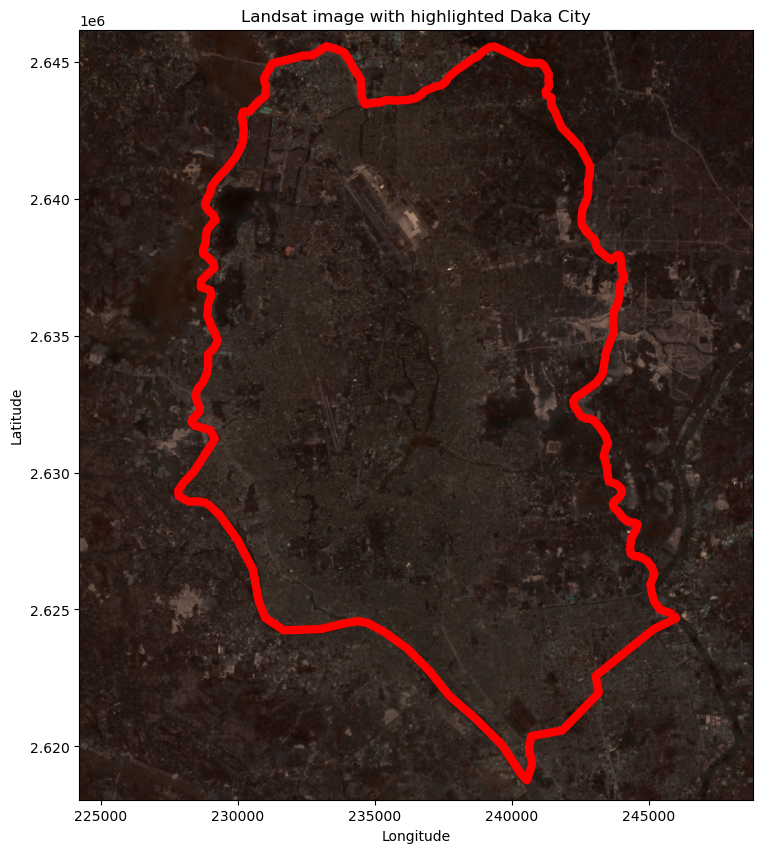

In [47]:
tiff, transform, tiff_crs, extent = load_tif(band_paths[0])

# Load the KML file
kml_gdf = gpd.read_file("dhaka_city_gis_project.kml", driver="KML", allow_unsupported_drivers=True)

# Reproject the KML to match the TIFF CRS
if kml_gdf.crs != tiff_crs:
    kml_gdf = kml_gdf.to_crs(tiff_crs)

# Plot the TIFF image
plt.figure(figsize=(10, 10))
plt.imshow(stacked_image, cmap='gray', extent=extent)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plot the KML features
kml_gdf.boundary.plot(ax=plt.gca(), color='red', linewidth=6)

# Add a title and show the plot
plt.title("Landsat image with highlighted Daka City")

plt.savefig("Landsat8/output/sample_image.png", dpi = 300, bbox_inches='tight')

plt.show()